In [272]:
import pandas as pd
df = pd.read_csv('M&M.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-29,434.000000,450.000000,431.100006,436.350006,429.650177,9539035
1,2020-06-01,441.850006,470.500000,441.500000,461.100006,454.020172,9668047
2,2020-06-02,465.100006,478.850006,460.850006,462.850006,455.743317,8520940
3,2020-06-03,470.000000,492.600006,466.500000,485.100006,477.651672,9873294
4,2020-06-04,485.299988,486.250000,469.399994,478.450012,471.103790,5829493


In [273]:
df1 = df.reset_index()['Close'] #selecting only the close value of the market in each day and basing the comparision on it

In [274]:
df1

0      436.350006
1      461.100006
2      462.850006
3      485.100006
4      478.450012
          ...    
494    941.900024
495    946.849976
496    928.400024
497    929.799988
498    952.849976
Name: Close, Length: 499, dtype: float64

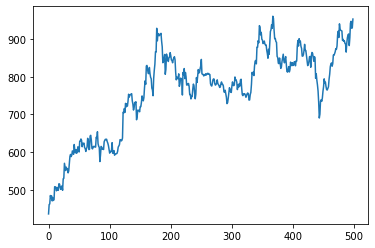

In [275]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [276]:
import numpy as np
df1
Ytesting = df1[425:499] #will be used to check the accuracy level of the model
#len(Xtesting)
Ytesting

425    832.049988
426    840.200012
427    853.049988
428    853.650024
429    825.049988
          ...    
494    941.900024
495    946.849976
496    928.400024
497    929.799988
498    952.849976
Name: Close, Length: 74, dtype: float64

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [278]:
print(df1)

[[0.        ]
 [0.04723733]
 [0.05057735]
 [0.09304323]
 [0.08035119]
 [0.09132552]
 [0.06584598]
 [0.08092374]
 [0.06813624]
 [0.07290769]
 [0.13760857]
 [0.13703596]
 [0.13436396]
 [0.11690047]
 [0.13407768]
 [0.12157646]
 [0.11909533]
 [0.15278179]
 [0.15077769]
 [0.13531825]
 [0.12415305]
 [0.13569999]
 [0.14190287]
 [0.11947706]
 [0.17816587]
 [0.17969271]
 [0.25613128]
 [0.2359958 ]
 [0.21929573]
 [0.23656835]
 [0.22616657]
 [0.22807515]
 [0.20774885]
 [0.21719634]
 [0.25679936]
 [0.29096285]
 [0.30088749]
 [0.29000856]
 [0.29707033]
 [0.31873266]
 [0.30985783]
 [0.30165097]
 [0.3511785 ]
 [0.32159553]
 [0.30918976]
 [0.32464932]
 [0.30689956]
 [0.31730122]
 [0.33953622]
 [0.3307568 ]
 [0.31319785]
 [0.36749695]
 [0.36873745]
 [0.37904383]
 [0.3723638 ]
 [0.33991795]
 [0.35738138]
 [0.35556833]
 [0.35795405]
 [0.33533732]
 [0.33104302]
 [0.31606072]
 [0.33018413]
 [0.33781845]
 [0.38247925]
 [0.37226839]
 [0.3255082 ]
 [0.32674871]
 [0.39393072]
 [0.39755707]
 [0.3734135 ]
 [0.33

In [279]:
#Splitting our data set into train set and test set with the ratio of 70-30.
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size


(349, 150)

In [280]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [281]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape),print(y_train.shape)
print(X_test.shape),print(ytest.shape)
#Ytest = [] 
#Xtrain = []
#d = test_data
#for i in range(len(d)-time_step-1):
   #     a = d[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
  #      Xtrain.append(a)
 #       Ytest.append(d[i + time_step, 0])
#Ytest

(273, 75)
(273,)
(74, 75)
(74,)


[0.7503578729009289,
 0.7552247267755418,
 0.7707796924783558,
 0.7953048884731139,
 0.7964501046590361,
 0.741864672876351,
 0.7982631632192708,
 0.8166809976147685,
 0.8128638393578568,
 0.7933009032911847,
 0.7724973449851172,
 0.7956866272017545,
 0.7900562958698604,
 0.6860387333690184,
 0.7085599441818474,
 0.6765912437802125,
 0.6527340046745148,
 0.6216241877836347,
 0.564843958712074,
 0.48516078009904373,
 0.5044374980052962,
 0.5697108125866869,
 0.5773451291005102,
 0.5696154065332136,
 0.5856475170181416,
 0.6200019413303463,
 0.6437637743825707,
 0.6833667912980289,
 0.6625632329919614,
 0.6665712033558194,
 0.6446225433785776,
 0.6284951413549243,
 0.626777374333415,
 0.6353659804114661,
 0.6431911090322359,
 0.6813626916013521,
 0.7065559589999183,
 0.7447275415690348,
 0.7583739281433929,
 0.7638133328535929,
 0.7472086715330776,
 0.7595190298145672,
 0.8036072763907453,
 0.8025574662582963,
 0.8100963767186463,
 0.8202118231965126,
 0.8354804562241592,
 0.832426775424

In [283]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_test)

[[[0.88367208]
  [0.87918696]
  [0.86172342]
  ...
  [0.82641471]
  [0.80131696]
  [0.77364256]]

 [[0.87918696]
  [0.86172342]
  [0.86716294]
  ...
  [0.80131696]
  [0.77364256]
  [0.75035787]]

 [[0.86172342]
  [0.86716294]
  [0.87451092]
  ...
  [0.77364256]
  [0.75035787]
  [0.75522473]]

 ...

 [[0.82708278]
  [0.82641471]
  [0.80131696]
  ...
  [0.85160797]
  [0.89216528]
  [0.96488221]]

 [[0.82641471]
  [0.80131696]
  [0.77364256]
  ...
  [0.89216528]
  [0.96488221]
  [0.97432959]]

 [[0.80131696]
  [0.77364256]
  [0.75035787]
  ...
  [0.96488221]
  [0.97432959]
  [0.93911639]]]


In [284]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [285]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(75,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [286]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 75, 50)            10400     
                                                                 
 lstm_28 (LSTM)              (None, 75, 50)            20200     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [302]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=75,batch_size=64,verbose=1)

Epoch 1/75
5/5 [==============================] - 0s 67ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 2/75
5/5 [==============================] - 0s 63ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 3/75
5/5 [==============================] - 0s 63ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 4/75
5/5 [==============================] - 0s 64ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 5/75
5/5 [==============================] - 0s 64ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/75
5/5 [==============================] - 0s 64ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 7/75
5/5 [==============================] - 0s 63ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 8/75
5/5 [==============================] - 0s 64ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 9/75
5/5 [==============================] - 0s 63ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 10/75
5/5 [==============================] - 0s 63ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 11/75
5/5 [============

In [303]:
#scaling the predicted data from the train set to its actual values
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

3/3 [==============================] - 0s 10ms/step


In [304]:
print(test_predict.shape)
test_predict

(74, 1)


array([[857.31305],
       [840.9748 ],
       [827.70306],
       [822.84894],
       [828.09064],
       [838.0073 ],
       [839.50275],
       [842.4037 ],
       [849.36566],
       [856.34656],
       [857.794  ],
       [851.7814 ],
       [846.21356],
       [842.48065],
       [825.9262 ],
       [808.3239 ],
       [792.3459 ],
       [778.90204],
       [766.7466 ],
       [751.4536 ],
       [728.5033 ],
       [709.1448 ],
       [705.25543],
       [713.7163 ],
       [726.66064],
       [740.54285],
       [755.7189 ],
       [771.37726],
       [788.46063],
       [799.79504],
       [803.87915],
       [799.04114],
       [787.2768 ],
       [773.98395],
       [764.5814 ],
       [761.31415],
       [767.5608 ],
       [781.9144 ],
       [802.8174 ],
       [824.56274],
       [841.5064 ],
       [848.1426 ],
       [847.67163],
       [849.41205],
       [852.63336],
       [856.29816],
       [860.17303],
       [865.0654 ],
       [868.704  ],
       [872.66614],


In [305]:
len(train_predict)

273

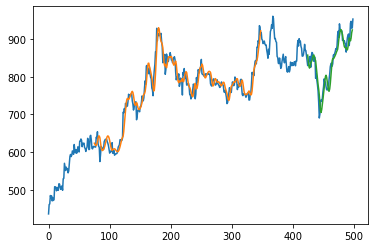

In [306]:
#plotting the data predicted, blue denotes the dataset values ,
#orange denotes the train-set and the blue denotes the predicted data set of the test data
look_back=75
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [307]:
#Checking the accuracy of the LSTM Model of the test-set on the basis of the train-set
from sklearn.metrics import r2_score
r2_score(Ytesting,test_predict)

0.8047496695592227

In [308]:
len(test_data)

150

In [309]:
150-75


75

In [310]:
x_input=test_data[75:].reshape(1,-1)
x_input

array([[0.75035787, 0.75522473, 0.77077969, 0.79530489, 0.7964501 ,
        0.74186467, 0.79826316, 0.816681  , 0.81286384, 0.7933009 ,
        0.77249734, 0.79568663, 0.7900563 , 0.68603873, 0.70855994,
        0.67659124, 0.652734  , 0.62162419, 0.56484396, 0.48516078,
        0.5044375 , 0.56971081, 0.57734513, 0.56961541, 0.58564752,
        0.62000194, 0.64376377, 0.68336679, 0.66256323, 0.6665712 ,
        0.64462254, 0.62849514, 0.62677737, 0.63536598, 0.64319111,
        0.68136269, 0.70655596, 0.74472754, 0.75837393, 0.76381333,
        0.74720867, 0.75951903, 0.80360728, 0.80255747, 0.81009638,
        0.82021182, 0.83548046, 0.83242678, 0.84912684, 0.90590707,
        0.92432491, 0.89254702, 0.9615422 , 0.93615801, 0.92861921,
        0.92709225, 0.92566082, 0.8774692 , 0.88309953, 0.87317489,
        0.87594236, 0.86267771, 0.86019658, 0.81858958, 0.86487262,
        0.8913064 , 0.90552533, 0.91029678, 0.85160797, 0.89216528,
        0.96488221, 0.97432959, 0.93911639, 0.94

In [311]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7503578729009289,
 0.7552247267755418,
 0.7707796924783558,
 0.7953048884731139,
 0.7964501046590361,
 0.741864672876351,
 0.7982631632192708,
 0.8166809976147685,
 0.8128638393578568,
 0.7933009032911847,
 0.7724973449851172,
 0.7956866272017545,
 0.7900562958698604,
 0.6860387333690184,
 0.7085599441818474,
 0.6765912437802125,
 0.6527340046745148,
 0.6216241877836347,
 0.564843958712074,
 0.48516078009904373,
 0.5044374980052962,
 0.5697108125866869,
 0.5773451291005102,
 0.5696154065332136,
 0.5856475170181416,
 0.6200019413303463,
 0.6437637743825707,
 0.6833667912980289,
 0.6625632329919614,
 0.6665712033558194,
 0.6446225433785776,
 0.6284951413549243,
 0.626777374333415,
 0.6353659804114661,
 0.6431911090322359,
 0.6813626916013521,
 0.7065559589999183,
 0.7447275415690348,
 0.7583739281433929,
 0.7638133328535929,
 0.7472086715330776,
 0.7595190298145672,
 0.8036072763907453,
 0.8025574662582963,
 0.8100963767186463,
 0.8202118231965126,
 0.8354804562241592,
 0.832426775424

In [312]:
#prediction of the 30 Days
from numpy import array

lst_output=[]
n_steps=75
i=0
while(i<30):
    
    if(len(temp_input)>75):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9328927]
76
1 day input [0.75522473 0.77077969 0.79530489 0.7964501  0.74186467 0.79826316
 0.816681   0.81286384 0.7933009  0.77249734 0.79568663 0.7900563
 0.68603873 0.70855994 0.67659124 0.652734   0.62162419 0.56484396
 0.48516078 0.5044375  0.56971081 0.57734513 0.56961541 0.58564752
 0.62000194 0.64376377 0.68336679 0.66256323 0.6665712  0.64462254
 0.62849514 0.62677737 0.63536598 0.64319111 0.68136269 0.70655596
 0.74472754 0.75837393 0.76381333 0.74720867 0.75951903 0.80360728
 0.80255747 0.81009638 0.82021182 0.83548046 0.83242678 0.84912684
 0.90590707 0.92432491 0.89254702 0.9615422  0.93615801 0.92861921
 0.92709225 0.92566082 0.8774692  0.88309953 0.87317489 0.87594236
 0.86267771 0.86019658 0.81858958 0.86487262 0.8913064  0.90552533
 0.91029678 0.85160797 0.89216528 0.96488221 0.97432959 0.93911639
 0.94178834 0.98578106 0.93289268]
1 day output [[0.92389786]]
2 day input [0.77077969 0.79530489 0.7964501  0.74186467 0.79826316 0.816681
 0.81286384 0.7933009  0.77249

16 day output [[0.7210202]]
17 day input [0.62162419 0.56484396 0.48516078 0.5044375  0.56971081 0.57734513
 0.56961541 0.58564752 0.62000194 0.64376377 0.68336679 0.66256323
 0.6665712  0.64462254 0.62849514 0.62677737 0.63536598 0.64319111
 0.68136269 0.70655596 0.74472754 0.75837393 0.76381333 0.74720867
 0.75951903 0.80360728 0.80255747 0.81009638 0.82021182 0.83548046
 0.83242678 0.84912684 0.90590707 0.92432491 0.89254702 0.9615422
 0.93615801 0.92861921 0.92709225 0.92566082 0.8774692  0.88309953
 0.87317489 0.87594236 0.86267771 0.86019658 0.81858958 0.86487262
 0.8913064  0.90552533 0.91029678 0.85160797 0.89216528 0.96488221
 0.97432959 0.93911639 0.94178834 0.98578106 0.93289268 0.92389786
 0.90552241 0.88280147 0.85890394 0.83560342 0.81398565 0.79473484
 0.77820981 0.76448232 0.7533946  0.74462998 0.73778135 0.73240578
 0.72807181 0.72438663 0.72102022]
17 day output [[0.7177163]]
18 day input [0.56484396 0.48516078 0.5044375  0.56971081 0.57734513 0.56961541
 0.58564752 0

In [313]:
day_new = np.arange(1,76)
day_pred = np.arange(76,106)

In [314]:
import matplotlib.pyplot as plt
len(df1)

499

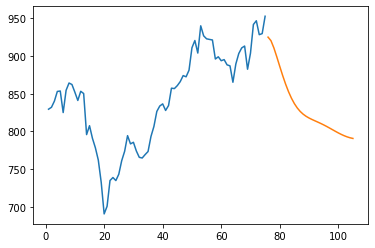

In [315]:
plt.plot(day_new,scaler.inverse_transform(df1[424:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

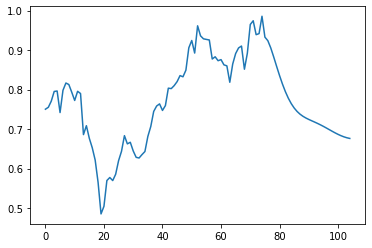

In [316]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[424:])

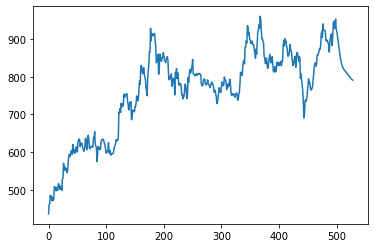

In [317]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)